In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90,high=90,size=1500)
lngs = np.random.uniform(low=-90,high=90,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ae6d99df2a193d8c3f4c5cb1809ce300


In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | estremoz
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | saint-louis
Processing Record 6 of Set 1 | norden
Processing Record 7 of Set 1 | pangnirtung
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | tabuk
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | nampula
Processing Record 13 of Set 1 | wajir
Processing Record 14 of Set 1 | upington
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | mecca
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | sorland
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | barra do garcas
Processing Record 22 of Set 1 | behbahan
Processing Record 23 of Set 1 | jamestow

Processing Record 37 of Set 4 | honningsvag
Processing Record 38 of Set 4 | puerto colombia
Processing Record 39 of Set 4 | sinnamary
Processing Record 40 of Set 4 | la asuncion
Processing Record 41 of Set 4 | hickory
Processing Record 42 of Set 4 | glarus
Processing Record 43 of Set 4 | kryry
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | karaul
City not found. Skipping...
Processing Record 47 of Set 4 | quatre cocos
Processing Record 48 of Set 4 | abu zabad
Processing Record 49 of Set 4 | san andres
Processing Record 50 of Set 4 | mizan teferi
Processing Record 1 of Set 5 | taltal
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | weinfelden
Processing Record 4 of Set 5 | abha
Processing Record 5 of Set 5 | shaumiani
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | balykshi
Processing Record 8 of Set 5 | jaisalmer
Processing Record 9 of Set 5 | mega
Processing Record 10 

Processing Record 28 of Set 8 | grenville
Processing Record 29 of Set 8 | totma
Processing Record 30 of Set 8 | iquique
Processing Record 31 of Set 8 | orta nova
Processing Record 32 of Set 8 | kologriv
Processing Record 33 of Set 8 | atar
Processing Record 34 of Set 8 | caravelas
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | kepno
Processing Record 37 of Set 8 | lodwar
Processing Record 38 of Set 8 | manthani
Processing Record 39 of Set 8 | yala
Processing Record 40 of Set 8 | tocache
Processing Record 41 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 8 | manaure
Processing Record 43 of Set 8 | lipetsk
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | adrar
Processing Record 46 of Set 8 | constitucion
Processing Record 47 of Set 8 | veraval
Processing Record 48 of Set 8 | quelimane
Processing Record 49 of Set 8 | mouila
Processing Record 50 of Set 8 | acarau
Processing Record 1 of Set 9 | nantucket

City not found. Skipping...
Processing Record 15 of Set 12 | thano bula khan
City not found. Skipping...
Processing Record 16 of Set 12 | barreirinhas
Processing Record 17 of Set 12 | talcahuano
Processing Record 18 of Set 12 | massaguet
Processing Record 19 of Set 12 | qibili
City not found. Skipping...
Processing Record 20 of Set 12 | filingue
Processing Record 21 of Set 12 | porto santo
Processing Record 22 of Set 12 | narsaq
Processing Record 23 of Set 12 | skelleftea
Processing Record 24 of Set 12 | landskrona
Processing Record 25 of Set 12 | portobelo
Processing Record 26 of Set 12 | takoradi
Processing Record 27 of Set 12 | chandbali
Processing Record 28 of Set 12 | ati
Processing Record 29 of Set 12 | presidencia roque saenz pena
Processing Record 30 of Set 12 | villa del rosario
Processing Record 31 of Set 12 | dunmore town
Processing Record 32 of Set 12 | snasa
Processing Record 33 of Set 12 | kalmunai
Processing Record 34 of Set 12 | chapais
Processing Record 35 of Set 12 | 

In [11]:
len(city_data)

567

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Estremoz,38.8443,-7.5859,65.23,55,85,9.17,PT,2022-09-23 20:38:56
1,Port Alfred,-33.5906,26.8910,60.19,87,100,1.01,ZA,2022-09-23 20:43:03
2,Cape Town,-33.9258,18.4232,57.11,61,0,10.36,ZA,2022-09-23 20:40:08
3,Ushuaia,-54.8000,-68.3000,51.46,43,40,14.97,AR,2022-09-23 20:41:42
4,Saint-Louis,16.3333,-15.0000,87.98,58,41,12.28,SN,2022-09-23 20:43:04
5,Norden,53.6000,7.2000,55.00,84,100,9.24,DE,2022-09-23 20:43:04
6,Pangnirtung,66.1451,-65.7125,37.40,56,20,14.97,CA,2022-09-23 20:43:05
7,Busselton,-33.6500,115.3333,51.53,80,100,10.11,AU,2022-09-23 20:43:06
8,Georgetown,5.4112,100.3354,77.90,94,20,2.30,MY,2022-09-23 20:38:16
9,Tabuk,17.4189,121.4443,69.91,84,38,2.33,PH,2022-09-23 20:43:07


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Estremoz,PT,2022-09-23 20:38:56,38.8443,-7.5859,65.23,55,85,9.17
1,Port Alfred,ZA,2022-09-23 20:43:03,-33.5906,26.8910,60.19,87,100,1.01
2,Cape Town,ZA,2022-09-23 20:40:08,-33.9258,18.4232,57.11,61,0,10.36
3,Ushuaia,AR,2022-09-23 20:41:42,-54.8000,-68.3000,51.46,43,40,14.97
4,Saint-Louis,SN,2022-09-23 20:43:04,16.3333,-15.0000,87.98,58,41,12.28
5,Norden,DE,2022-09-23 20:43:04,53.6000,7.2000,55.00,84,100,9.24
6,Pangnirtung,CA,2022-09-23 20:43:05,66.1451,-65.7125,37.40,56,20,14.97
7,Busselton,AU,2022-09-23 20:43:06,-33.6500,115.3333,51.53,80,100,10.11
8,Georgetown,MY,2022-09-23 20:38:16,5.4112,100.3354,77.90,94,20,2.30
9,Tabuk,PH,2022-09-23 20:43:07,17.4189,121.4443,69.91,84,38,2.33


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Get Data For Plotting
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

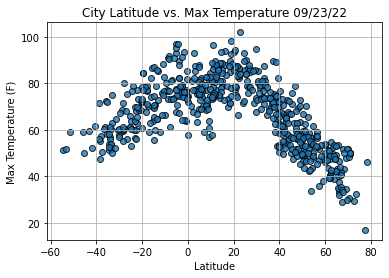

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

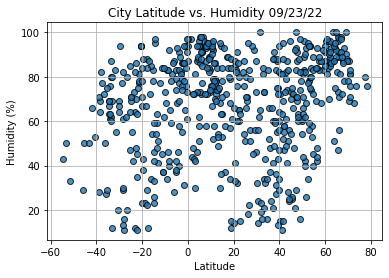

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plt.
plt.show()

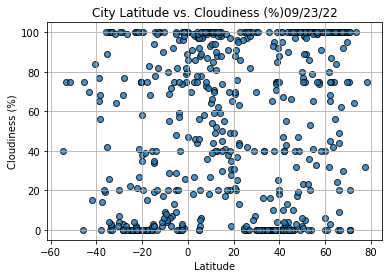

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

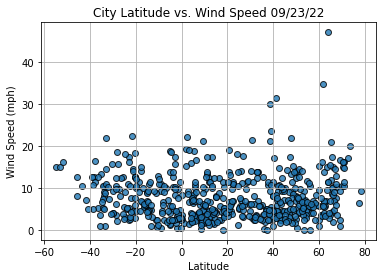

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13=city_data_df.loc[13]
index13

City                     Upington
Country                        ZA
Date          2022-09-23 20:43:09
Lat                      -28.4478
Lng                       21.2561
Max Temp                    59.38
Humidity                       29
Cloudiness                      3
Wind Speed                   3.44
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Estremoz,PT,2022-09-23 20:38:56,38.8443,-7.5859,65.23,55,85,9.17
4,Saint-Louis,SN,2022-09-23 20:43:04,16.3333,-15.0000,87.98,58,41,12.28
5,Norden,DE,2022-09-23 20:43:04,53.6000,7.2000,55.00,84,100,9.24
6,Pangnirtung,CA,2022-09-23 20:43:05,66.1451,-65.7125,37.40,56,20,14.97
8,Georgetown,MY,2022-09-23 20:38:16,5.4112,100.3354,77.90,94,20,2.30


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

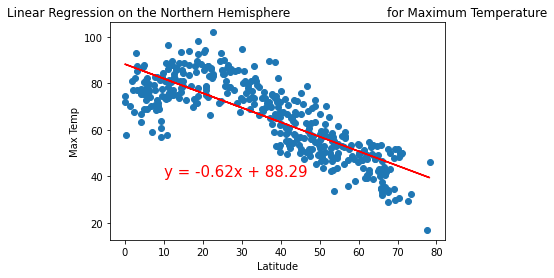

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

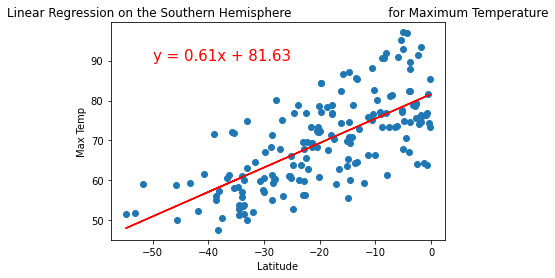

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

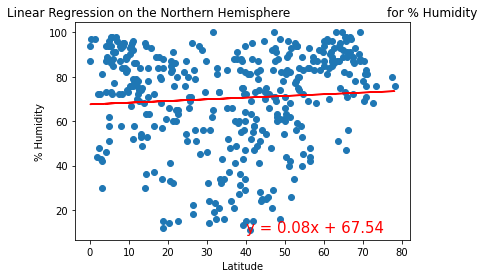

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

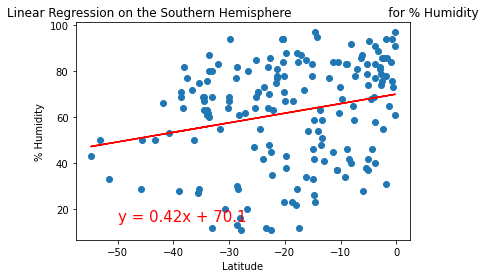

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

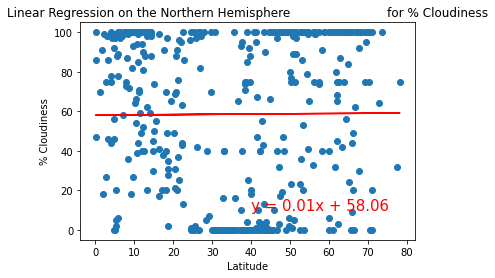

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

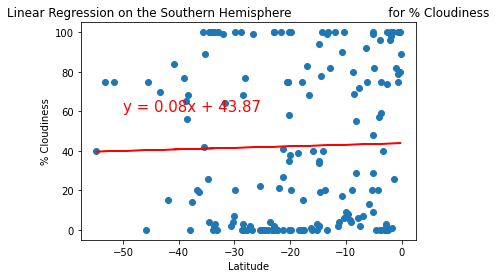

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

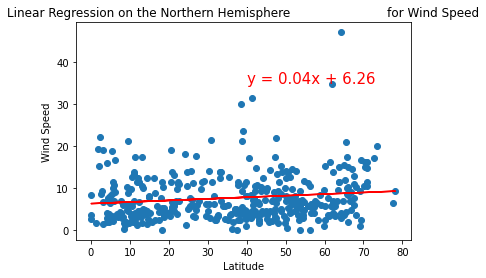

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

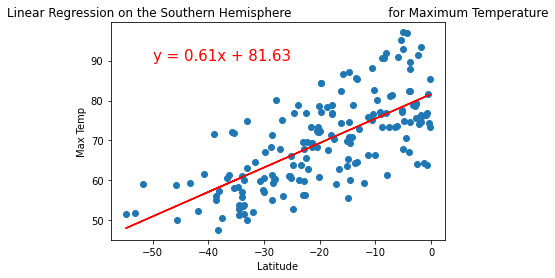

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))